In [1]:
import matplotlib.pyplot as plt
import webdataset as wds

/home/wei.ouyang/miniconda3/envs/ldm/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
url = "/data/wei/hpa-webdataset-all-composite/webdataset_img.tar"
dataset = wds.WebDataset(url).decode().to_tuple("__key__", "img.pyd")
dataset_iter = iter(dataset)
key, img = next(dataset_iter)

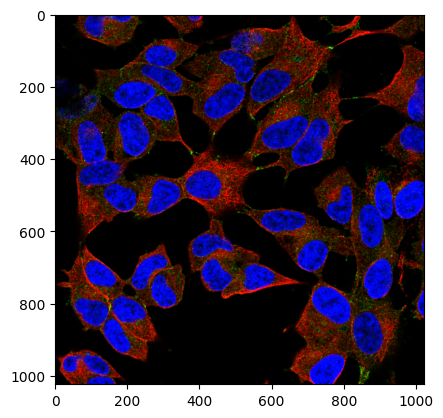

In [3]:
plt.imshow(img[:, :, :3])

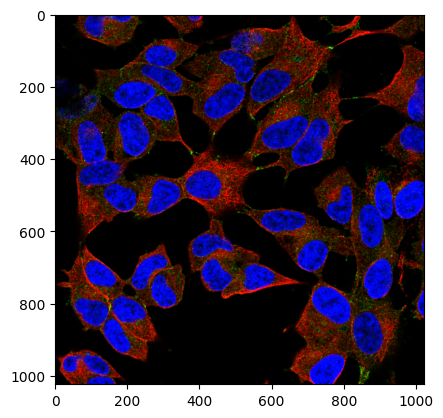

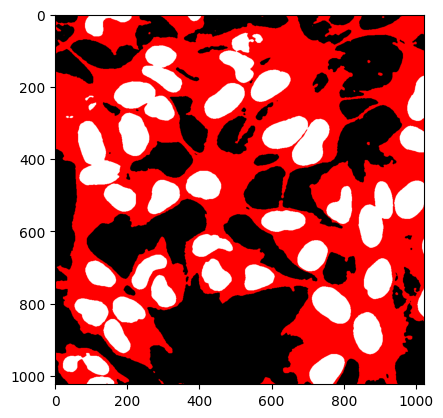

In [12]:
import skimage
import numpy as np
from skimage.morphology import reconstruction

def generate_cell_mask(img):
    # Create the nuclei mask
    blurred_image = skimage.filters.gaussian(img[:, :, 2], sigma=2.0)
    t = skimage.filters.threshold_otsu(blurred_image)
    nuclei_binary_mask = blurred_image > t

    # Fill holes in the nuclei
    seed = np.copy(nuclei_binary_mask)
    seed[1:-1, 1:-1] = nuclei_binary_mask.max()
    nuclei_filled = reconstruction(seed, nuclei_binary_mask, method='erosion')
    nuclei_mask = nuclei_filled > 0

    # Create the cell body image
    gray_image = img[:, :, 0] + img[:, :, 1] + nuclei_filled + img[:, :, 3] > 0
    # blur the image to denoise
    blurred_image = skimage.filters.gaussian(gray_image, sigma=2.0)
    t = skimage.filters.threshold_otsu(blurred_image)
    binary_mask = blurred_image > t  

    return binary_mask, nuclei_mask

binary_mask, nuclei_mask = generate_cell_mask(img)

fig, ax = plt.subplots()
plt.imshow(img[:, :, :3], cmap="gray")

fig, ax = plt.subplots()
plt.imshow(255 * np.stack([binary_mask, nuclei_mask, nuclei_mask ], axis=2), cmap="gray")

In [20]:


# convert the image to grayscale
gray_image = skimage.color.rgb2gray(img[:, :, [0,1,3]])

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=4.0)

t = skimage.filters.threshold_otsu(blurred_image)

binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

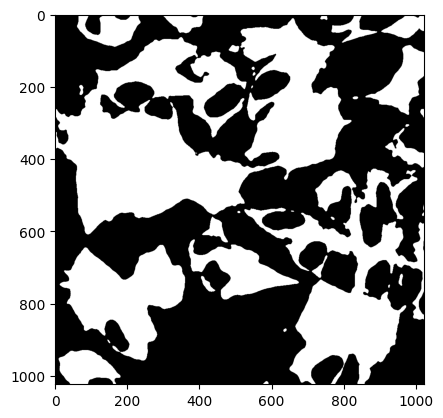

In [19]:
import numpy as np
from skimage.morphology import reconstruction

seed = np.copy(binary_mask)
seed[1:-1, 1:-1] = binary_mask.max()
mask = binary_mask

filled = reconstruction(seed, mask, method='erosion')
fig, ax = plt.subplots()
plt.imshow(filled, cmap="gray")

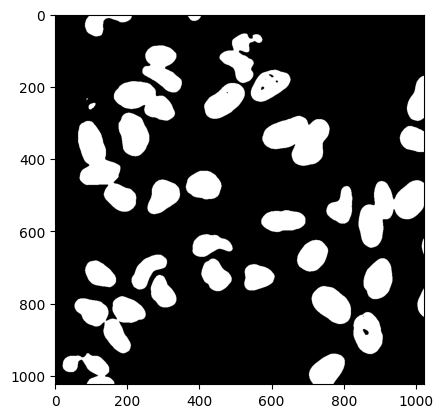

In [16]:
# blur the image to denoise
blurred_image = skimage.filters.gaussian(img[:, :, 2], sigma=4.0)

t = skimage.filters.threshold_otsu(blurred_image)

binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

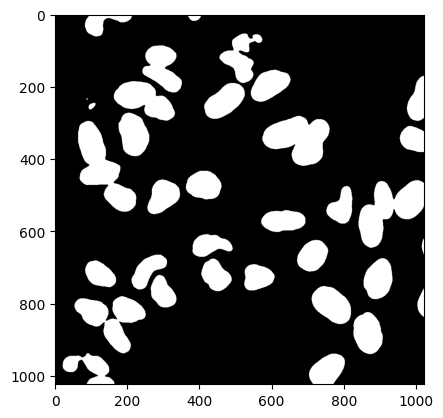

In [10]:
import numpy as np
from skimage.morphology import reconstruction

blurred_image = skimage.filters.gaussian(img[:, :, 2], sigma=4.0)

t = skimage.filters.threshold_otsu(blurred_image)

binary_mask = blurred_image > t

seed = np.copy(binary_mask)
seed[1:-1, 1:-1] = binary_mask.max()
mask = binary_mask

filled = reconstruction(seed, mask, method='erosion')
fig, ax = plt.subplots()
plt.imshow(filled, cmap="gray")